In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import re

In [87]:
df = pd.read_csv("F:/Pre Sales/Service17/Data Science/SFO Project/Police_Department_Incidents_-_Current_Year__2018_.csv")

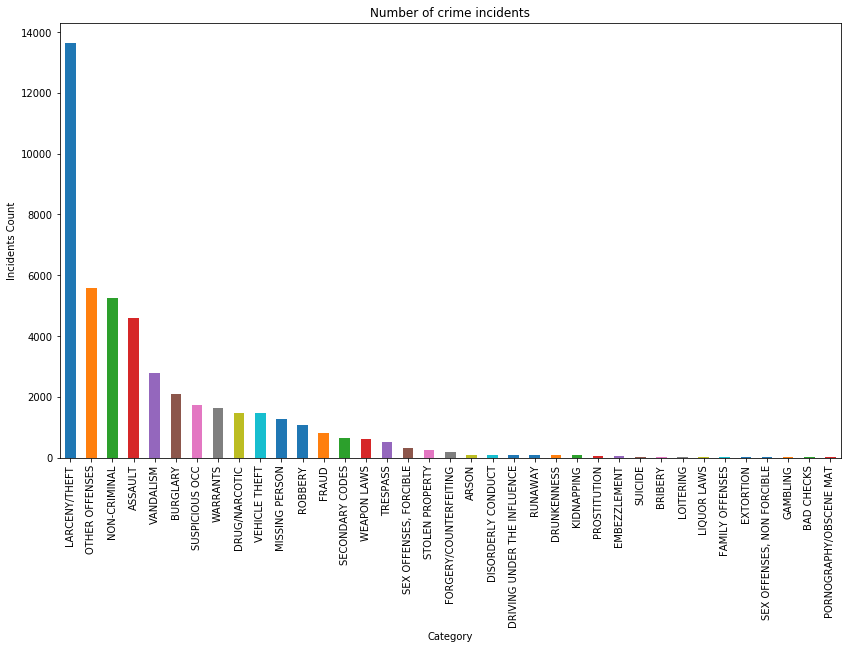

In [3]:
ax = df['Category'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number of crime incidents")
ax.set_xlabel("Category")
ax.set_ylabel("Incidents Count")
plt.show()

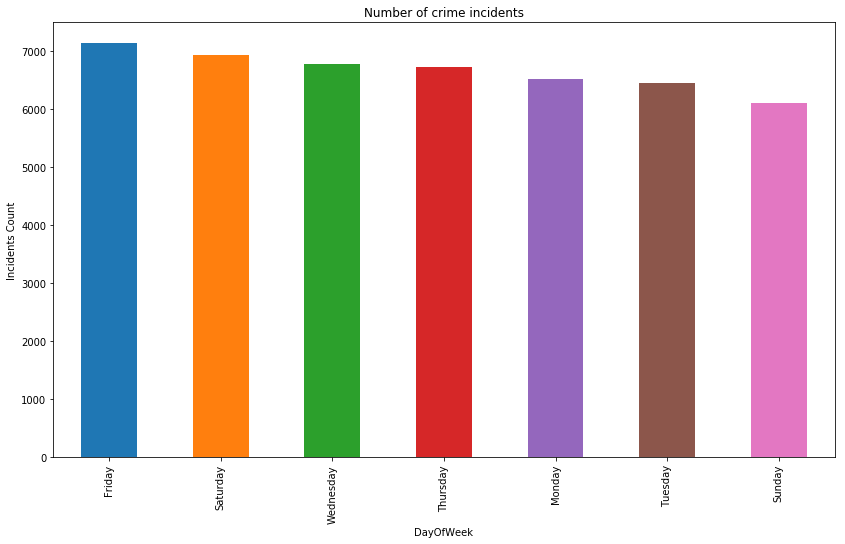

In [4]:
ax = df['DayOfWeek'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number of crime incidents")
ax.set_xlabel("DayOfWeek")
ax.set_ylabel("Incidents Count")
plt.show()

In [88]:
s="2100 Block of MARKET ST"
new_s=s.split(" ",1)[1]
print (new_s)

Block of MARKET ST


In [89]:
def adress_Process(address):
    s1 =[]
  
    #s = '2100 Block  \ of MARKET ST'
    s = address
    t = s.find('/')
    
    #print(t)
    if t <= 0:
        s1 = re.findall(r'^\d+|\S+ +\S+$', s)
        s2 = s1[1]
    else:
        s2 =s
    return s2

In [90]:
df['Address_Street'] = df['Address'].apply(adress_Process)

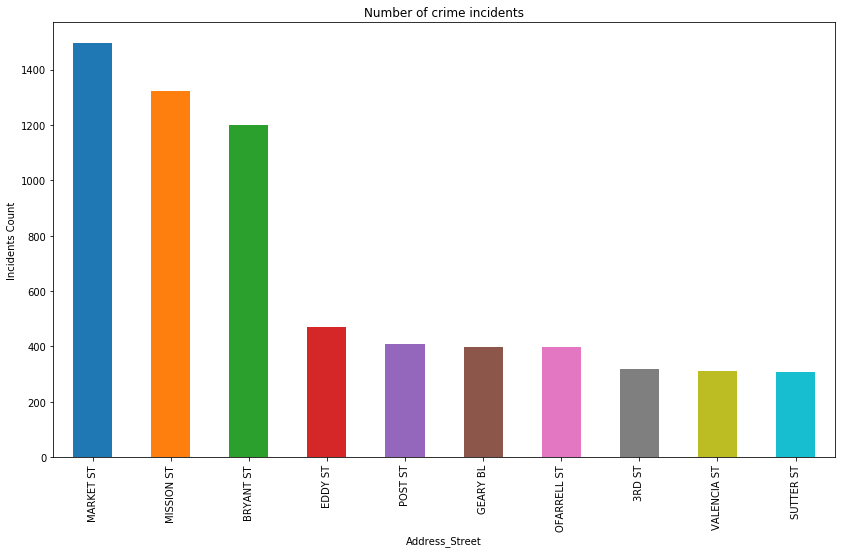

In [8]:
ax = df['Address_Street'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number of crime incidents")
ax.set_xlabel("Address_Street")
ax.set_ylabel("Incidents Count")
plt.show()

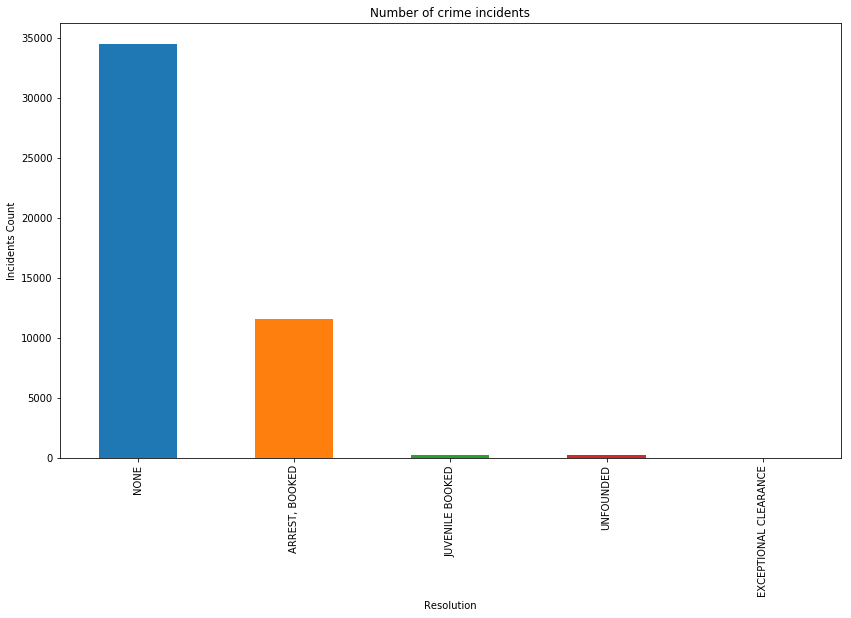

In [9]:
ax = df['Resolution'].value_counts().sort_values(ascending=False).head(5).plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number of crime incidents")
ax.set_xlabel("Resolution")
ax.set_ylabel("Incidents Count")
plt.show()

In [13]:
t = 22.57
print (round(t))

23


In [91]:
#df['Time_round']= df['Time'].apply(trim_decimal)
#print (trim_decimal('12.37'))
#df['Time_New']=df['Time'].dt.round('15min')
df['Time'] = pd.to_datetime(df['Time'])
df['hour'] = df['Time'].dt.round('H').dt.hour

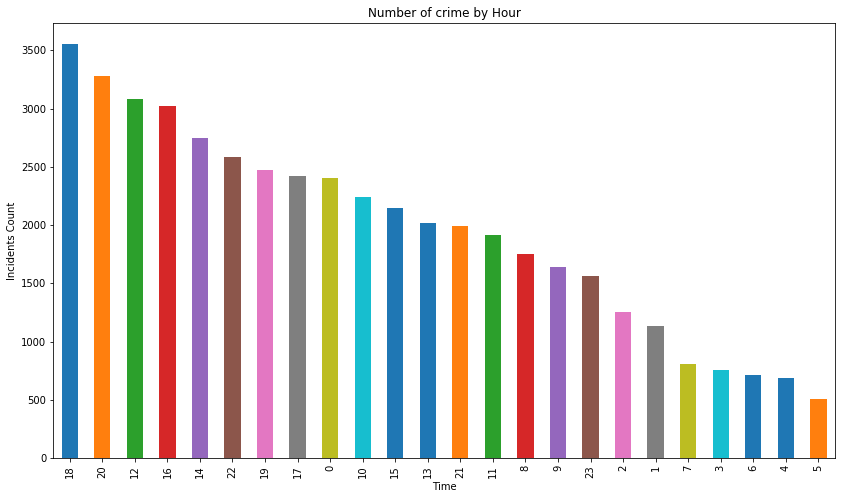

In [47]:
ax = df['hour'].value_counts().sort_values(ascending=False).head(24).plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number of crime by Hour")
ax.set_xlabel("Time")
ax.set_ylabel("Incidents Count")
plt.show()

In [92]:
df_new = df

In [97]:
## Need to do binning of columns into numbers
df_new.Category=df_new.Category.astype('category').cat.codes
df_new.Descript=df_new.Descript.astype('category').cat.codes
df_new.DayOfWeek=df_new.DayOfWeek.astype('category').cat.codes
df_new.Date=df_new.Date.astype('category').cat.codes
df_new.hour=df_new.hour.astype('category').cat.codes
df_new.Address_Street=df_new.Address_Street.astype('category').cat.codes
df_new.PdDistrict=df_new.PdDistrict.astype('category').cat.codes
df_new.Resolution=df_new.Resolution.astype('category').cat.codes

In [99]:
df1 = df_new.ix[:, ['Descript', 'DayOfWeek','Date','hour','Address_Street','Resolution','PdDistrict']]
df2 = df.ix[:,['Category']]

C:\Users\gaurav.mittal\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [100]:
X = df1.iloc[:, :].values
y = df2.iloc[:, :].values

In [101]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [102]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

C:\Users\gaurav.mittal\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [103]:
y_pred = classifier.predict(X_test)

In [105]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


[[  0   4   0 ...   0   0   0]
 [  0 565   0 ...   7  20   5]
 [  0   0   0 ...   0   0   0]
 ...
 [  0  10   0 ... 237   0   0]
 [  0  23   0 ...   0 202   0]
 [  0   6   0 ...   0  22  10]]


In [107]:
from sklearn.metrics import accuracy_score
accuracy_score = accuracy_score(y_test, y_pred)
print (accuracy_score)

0.6415530984829005


In [112]:
df_test = pd.read_csv("F:/Pre Sales/Service17/Data Science/SFO Project/Police_Department_Incidents_-_Previous_Year__2017_ - Copy.csv")

In [114]:
df_test['Address_Street'] = df['Address'].apply(adress_Process)
df_test['Time'] = pd.to_datetime(df_test['Time'])
df_test['hour'] = df_test['Time'].dt.round('H').dt.hour

In [115]:
## Need to do binning of columns into numbers
df_test.Descript=df_test.Descript.astype('category').cat.codes
df_test.DayOfWeek=df_test.DayOfWeek.astype('category').cat.codes
df_test.Date=df_test.Date.astype('category').cat.codes
df_test.hour=df_test.hour.astype('category').cat.codes
df_test.Address_Street=df_test.Address_Street.astype('category').cat.codes
df_test.PdDistrict=df_test.PdDistrict.astype('category').cat.codes
df_test.Resolution=df_test.Resolution.astype('category').cat.codes

In [116]:
df1_test = df_test.ix[:, ['Descript', 'DayOfWeek','Date','hour','Address_Street','Resolution','PdDistrict']]

C:\Users\gaurav.mittal\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [117]:
X_test_r = df1_test.iloc[:, :].values

In [118]:
y_pred_r = classifier.predict(X_test_r)

In [120]:
y_pred_r = pd.DataFrame(y_pred_r, columns=['y_pred_r']).to_csv('F:/Pre Sales/Service17/Data Science/SFO Project/pred.csv')

In [124]:
y_pred_r = pd.DataFrame(df_new['Category'], columns=['Category']).to_csv('F:/Pre Sales/Service17/Data Science/SFO Project/Cat.csv')
